# Modelo SIR: Uma abordagem estocástica e determinística

- PET - Física
- Petianos: Ylana Karolina Santos Lopes
- Data: 11 de Abril de 2025

$\quad$ O presente `Notebook` tem como objetivo o estudo do modelo SIR, um modelo matemático simples usado em epidemologia para descrever a propagação de doenças infeciosas. Adotaremos uma abordagem comparativa, analisando o comportamento modelo na sua forma determinísca e estocástica. Dessa forma, este trabalho introduzirá conceitos chave de epidemologia e propagação de doenças, como também discutirá o algoritmo de Gillepse que foi implementado para a abordagem estocástica. Este `Notebook` será organizado da seguinte forma:

1. *Introdução;*
2. *Abordagem Determinística;*
3. *Abordagem Estocástica;*
4. *Comparação;*
5. *Conclusão*

## Nota de Agradecimento

---

O conteúdo desse `Notebook` foi inspirado no trabalho realizado na Escola de Verão ICTP-SAIFR para Jovens Físicos no início de 2023, superviosionado por Andrés Guzmán que idealizou o projeto e nos guiou durante o evento. Por mais que não tenha continuado nesse campo, 2 anos depois ainda rende frutos - além de ter me feito enxergar a física com novos olhos. Então deixo aqui os meus agradecimentos a Andrés, Matheus, Isabella e Felipi.

---

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint


## Detalhes das bibliotecas

In [2]:
%load_ext version_information
%version_information matplotlib, numpy, scipy

Software versions
Python 3.11.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22631 SP0
matplotlib 3.8.0
numpy 1.26.4
scipy 1.12.0
Sat Apr 05 09:29:37 2025 Hora oficial do Brasil

In [ ]:
""" Só uma função para formatar as figuras, e deixar o o código menos poluído. """
def format():
    plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(frameon = False)

## 1. Introdução
$\quad$ Uma doença é dita infecciosa quando o agente causador (virus, bactéria, protozoário ou toxina) pode ser transmitido de um indivíduo (hospedeiro) para outro por meio de modos de transmissão como o toque, gotículas no ar, ou até de mãe para filho. Ao infectar parcela considerável da população em um intervalo curto de tempo, a doença é dita uma epidemia. E ao se espalhar por todo o globo, se transforma numa pandemia - o que é cada vez mais fácil com o crescimento do fluxo aéreo de passageiros. Assim, modelagem matemática pode prover um entendimento do mecanismo de disseminação das doenças, ajudando a definir pontos importantes no processo de transmissão e consequentemente como por em prática medidas preventivas.

$\quad$ Geralmente, epidemias não são a primeira coisa que vem a mente quando se pensa em física e matemática. Porém, a característica da física de descrever processos naturais usando de artifícios matemáticos se enquandra perfeitamente no contexto deste `Notebook`. A modelagem matemática dentro da epidemologia adota uma posição importante, criando modelos que que auxiliam na tomada de decisões em épocas de crise pública - como em 2020, com o Covid-19. Com isso, é possível prever a evolução de uma doença otimizando a distribuição de recursos para combater seu avanço. Aqui trataremos do modelo SIR que divide a população em três grupos: Suscetível (S); Infectados (I); e Recuperados (R). Apesar da sua simplicidade, esse modelo é capaz de descrever os processos de transmissão da doença, e consequente transição de um grupo ao outro.

## 2. Abordagem determinística
### 2.1 Modelo SIR

$\quad$ Nós vamos considerar uma epidemia evoluindo em uma população de tamanho N constante. Para fins de entendimento, vamos pensar nesse modelo na sua forma determinística nessa seção. A estrutura do modelo SIR está disposta aqui na sua versão mais básica. Como citado na introdução, nesse modelo a população é divididade em três grupos:

- (**S**) o grupo dos suscetíveis: os indivíduos "saudáveis" que são capazes de contrair a doença e se tornarem infectados;
- (**I**) o grupo dos infectados: aqueles indivíduos que foram infectados, e são capazes de transmitir a doença para os suscetíveis;
- (**R**) o grupo dos recuperados: os indivíduos que contraíram a doença e se tornam permanentemente imunes, ou morreram - não sendo capazes de continuar a transmitir a doença.

$\quad$ No nosso caso, não estamos considerando a dinâmica de vitalidade que descreve as taxas de nascimento e mortalidade natural. Essa adição seria importante para doenças que permanecem em uma população por décadas, de forma que o número de pessoas que nascem e morrem se torna relevante. O tipo de epidemias que modelamos nesse `Notebook` se aproxima mais da influenza, rubeola ou do próprio Covid-19. Ou seja, acontecem relativamente rápidas o que nos leva a desprezar a dinâmica de vitalidade, assumindo que o número de mortes e de nascimentos se anulam. Assim, podemos considerar a população $N$ como constante de acordo com a expressão abaixo.

$$N = S + I + R $$

$\quad$ Com isso, para descrever a dinâmica com que nossa epidemia hipotética evolui precisamos de equações diferenciais. Aqui usamos o conjunto de três equações - uma para descrever as taxas de transferência de um compartimento para outro, tudo em função do tempo.

$$
\begin{align}
\frac{dS}{dt} &= - \beta S I \tag{1} \\
\frac{dI}{dt} &= \beta S I - \mu I \tag{2}\\
\frac{dR}{dt} &= \mu I \tag{3}\\
\end{align}
$$

Em que $\beta$ e $\mu$ são as constantes de infecção e recuperação, respectivamente. Também é observado que não há período de latência nesse modelo, então um indivíduo suscetível fica imediatamente infeccioso se infectado. Agora, analisando cada termo das equações diferenciais, é possível ver que são bem intuitivas quando pensamos na própria dinâmica da propagação de uma doença. Exploraremos isso mais a fundo nas próximas seções.

$\quad$ Com isso em mente, podemos definir o sistema de equações diferenciais no código. Definimos a função `dydt_SIR` como sendo o próprio sistema de equações diferenciais. Em que $y$ corresponde às condições iniciais normalizadas de cada grupo.


In [3]:
# Definimos uma função com o sistema das equações diferencias do Modelos SIR, em que fizemos y[0]= S, y[1]= I, y[2]= R
def dydt_SIR(y, t, beta,mu):
    dydt=[0,0,0]
    dydt[0]=-beta*y[0]*y[1] 
    dydt[1]= beta*y[0]*y[1] - mu*y[1]
    dydt[2]= mu*y[1]
    return dydt

$\quad$ Dessa forma, podemos definir um modelo determinístico como um modelo que descreve o que acontece em média em uma população, sem levar em conta os efeitos do acaso. Como já introduzido anteriormente, os modelos determinísticos se baseiam em equações diferenciais. Ou seja, dado um conjunto de condições iniciais (no caso do modelo SIR o número inicial de indivíduos suscetíveis e infectados), é possível prever completamente o futuro comportamento do sistema definido. Não há elementos de aleatoriedade, sempre retornando o mesmo resultado. Assim, o modelo depende apenas das condições iniciais e constantes do sistema. 

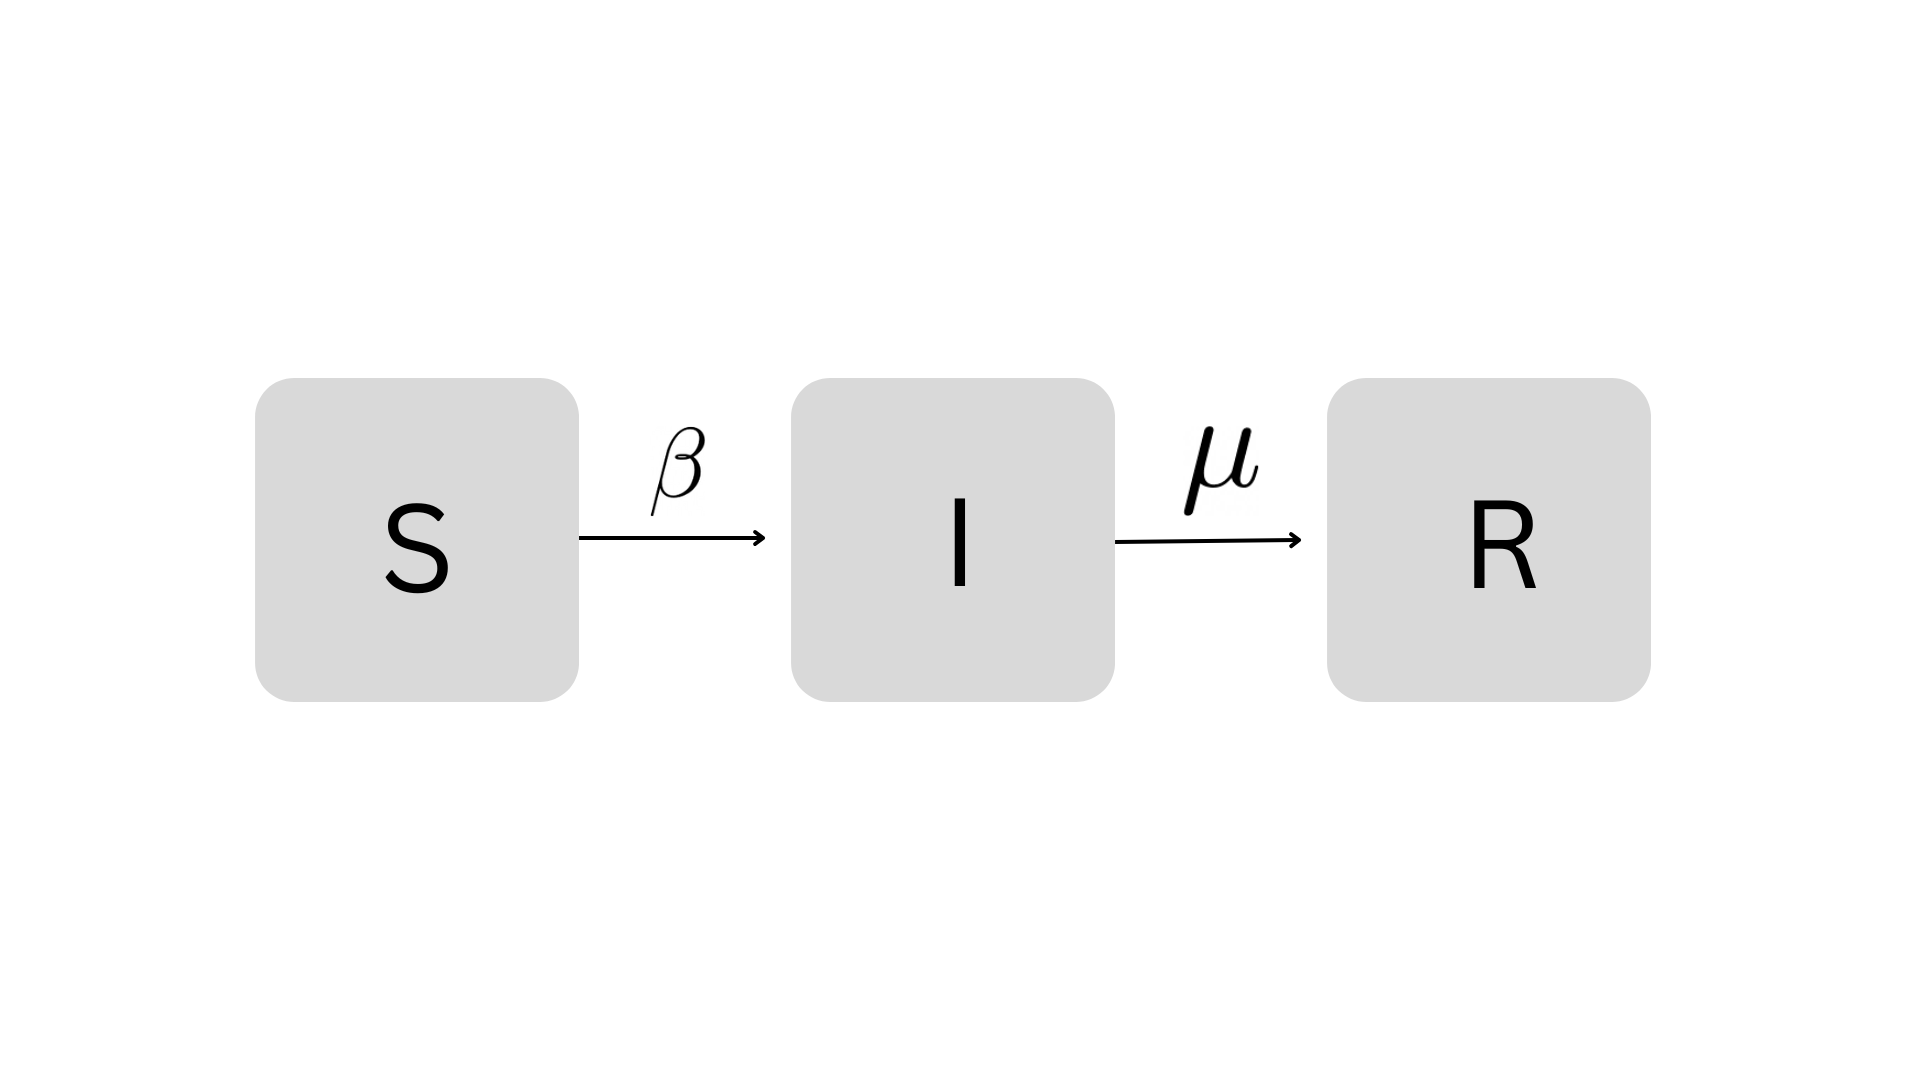
**Figura 1:** diagrama esquematizando o modelo SIR, em que $\beta$ corresponde a constante de infecção, e o $\mu$ a de recuperação.

In [4]:
# Definimos os parametros e condições iniciais

mu = 0.1 # Constante de recuperação 
y0 = [0.99,0.01, 0] # Condições iniciais normalizadas
t = np.linspace(0, 50, 100) # Intervalo de tempo

# Resolvemos o sistema de equações diferenciais usando a função odeint
sol_SIR = odeint(dydt_SIR, y0, t, args=(beta, mu))

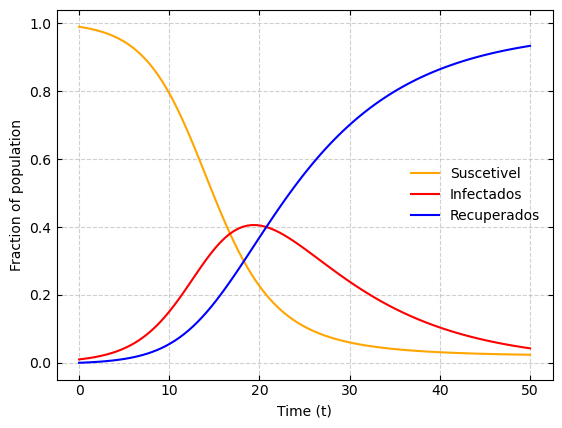

In [19]:
plt.plot(t, sol_SIR[:, 0], 'orange', label='Suscetível')
plt.plot(t, sol_SIR[:, 1], 'red', label='Infectados')
plt.plot(t, sol_SIR[:, 2], "blue", label="Recuperados")
plt.xlabel("Time (t)")
plt.ylabel("Fraction of population")
format()


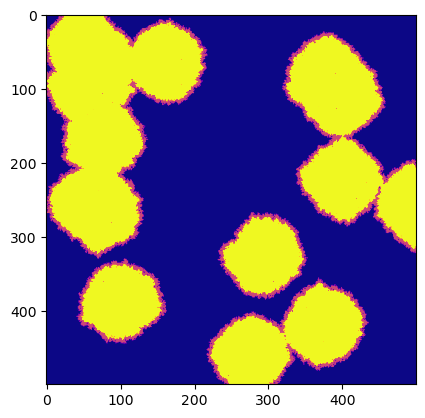

In [32]:
# Grid size
N = 500
infection_rate = 0.4  # Probability of infection from an infected neighbor
recovery_time = 10    # Time steps before an infected person recovers

# States
SUSCEPTIBLE = 0  # Blue
INFECTED = 1     # Red
RECOVERED = 3    # Green

# Initialize the grid
grid = np.zeros((N, N), dtype=int)

# Introduce a few initial infections randomly
num_initial_infected = 15
for _ in range(num_initial_infected):
    x, y = np.random.randint(0, N, 2)
    grid[x, y] = INFECTED

# Track infection time for each cell
infection_timer = np.zeros((N, N), dtype=int)

# Function to update the grid for each time step
def update(frame):
    global grid, infection_timer
    new_grid = grid.copy()
    
    for x in range(N):
        for y in range(N):
            if grid[x, y] == SUSCEPTIBLE:  # If susceptible, check neighbors
                neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
                neighbors = [(i, j) for i, j in neighbors if 0 <= i < N and 0 <= j < N]
                if any(grid[i, j] == INFECTED for i, j in neighbors):
                    if np.random.rand() < infection_rate:
                        new_grid[x, y] = INFECTED  # Infection occurs
            
            elif grid[x, y] == INFECTED:  # If infected, update recovery timer
                infection_timer[x, y] += 1
                if infection_timer[x, y] >= recovery_time:
                    new_grid[x, y] = RECOVERED  # Recover after set time

    grid[:] = new_grid  # Update grid

    # Update visualization
    img.set_array(grid)
    return img,

# Set up the figure for animation
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap="plasma", vmin=0, vmax=2)

# Create animation

ani = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=False)
ani.save('sir_simulation.gif', writer='pillow', fps=10)



![SIR Model Simulation](sir_simulation.gif)

In [11]:
def gillespie_algorithm(reactions, initial_state, total_population, t_max):
    """ Implements the pure Gillespie algorithm for any reaction system. """
    state = (np.array(initial_state) * total_population).astype(int)
    t = 0
    times = [t]
    states = [state.copy() / total_population]  # Normalize initial state
    
    while t < t_max:
        rates = np.array([reaction[0](*state) for reaction in reactions])
        total_rate = np.sum(rates)
        
        if total_rate == 0:
            break
        
        dt = np.random.exponential(1 / total_rate)
        t += dt
        
        chosen_reaction = np.random.choice(len(reactions), p=rates / total_rate)
        state += reactions[chosen_reaction][1]
        
        times.append(t)
        states.append(state.copy() / total_population)  # Normalize state
        
    return times, np.array(states)


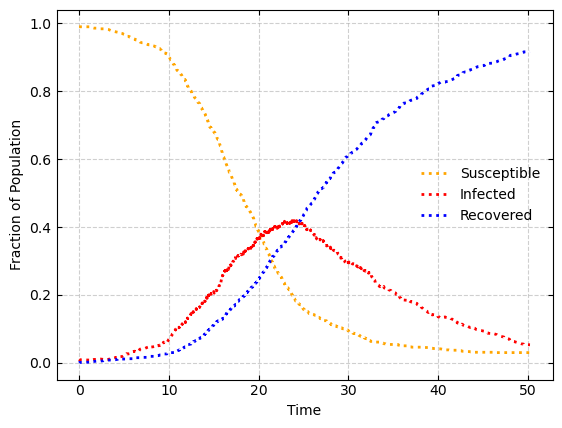

In [30]:
# Define SIR model parameters

total_population = 1000  # Total population
beta = 0.4/total_population  # Match deterministic model by scaling with population
gamma = 0.1    # Recovery rate

# Define infection and recovery rate functions
def infection_rate(S, I, R):
    return beta * S * I #- gamma*I

def recovery_rate(S, I, R):
    return gamma * I

# Define possible reactions with state changes
reactions = [
    (infection_rate, np.array([-1, 1, 0])),  # Susceptible -> Infected
    (recovery_rate, np.array([0, -1, 1]))   # Infected -> Recovered
]

# Run simulation
t_max = 50  # Match deterministic model time range
times, states = gillespie_algorithm(reactions, y0, total_population, t_max)

# Plot results

plt.plot(times, states[:, 0], label='Susceptible', color='orange', ls = ':',linewidth=2)
plt.plot(times, states[:, 1], label='Infected', color='red', ls = ':', linewidth=2)
plt.plot(times, states[:, 2], label='Recovered', color='blue',ls = ':', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
format()
#plt.title('Gillespie Algorithm Simulation for SIR Model (Normalized, Percentage-Based)')
plt.show()


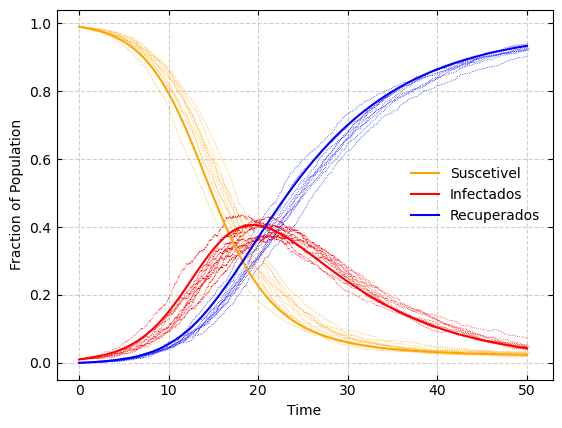

In [31]:

# Run simulation
for i in range(0,10):
    t_max = 50  # Match deterministic model time range
    times, states = gillespie_algorithm(reactions, y0, total_population, t_max)

    plt.plot(times, states[:, 0], color='orange', ls = ':',linewidth=0.5)
    plt.plot(times, states[:, 1], color='red', ls = ':', linewidth=0.5)
    plt.plot(times, states[:, 2], color='blue',ls = ':', linewidth=0.5)

# Plot results
plt.plot(t, sol_SIS[:, 0], 'orange', label='Suscetivel')
plt.plot(t, sol_SIS[:, 1], 'red', label='Infectados')
plt.plot(t, sol_SIS[:, 2], "blue", label="Recuperados")
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
#plt.title('Gillespie Algorithm Simulation for SIR Model (Normalized, Percentage-Based)')
format()
plt.show()


## Referências

**[]** Capasso, V. (2008). Mathematical Structures of Epidemic Systems. Springer Science & Business Media.

**[]** Vynnycky, E., White, R.G. and Fine, P.E.M. (2011). An introduction to infectious disease modelling. Oxford Oxford University Press.

**[]** Li, M.Y. (2019). Introduction To Mathematical Modeling Of Infectious Diseases. S.L.: Springer International Pu.


**[]** Hethcote H.W. (1989). Three Basic Epidemiological Models. Em: Levin, S.A., Hallam, T.G. and Gross, L.J. Applied Mathematical Ecology. Springer Science & Business Media, pp.120-144.

**[]** Gillespie, D.T. (1977). Exact stochastic simulation of coupled chemical reactions. The Journal of Physical Chemistry, 81(25), pp.2340–2361. doi:https://doi.org/10.1021/j100540a008.

‌
